<a href="https://colab.research.google.com/github/mzaman202006/CancerPrediction/blob/main/Predicting_Breast_Cancer_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score,recall_score,f1_score


import tensorflow as tf
from tensorflow.keras import layers, callbacks
from tensorflow.keras import Model, Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


df = pd.read_csv('data.csv')
del df['Unnamed: 32']

cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)


cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
df = df.drop(cols, axis=1)
df.columns



Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

In [2]:

X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
md = Sequential()

In [4]:

md.add(Dense(units=8, kernel_initializer='normal', activation='relu', input_dim=16))

md.add(Dropout(rate=0.1))


md.add(Dense(units=8, kernel_initializer='normal', activation='relu'))

md.add(Dropout(rate=0.1))
md.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

md.add(Dense(units=1, kernel_initializer='normal', activation='sigmoid'))




#md.fit(X_train, y_train, batch_size=100, epochs=250)

#History VIEW


In [5]:
import time
start = time.perf_counter()

early_stopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                          patience=30)

history = md.fit(X_train, y_train,
                    epochs = 500, 
                    validation_data = (X_test, y_test), 
                    shuffle = True)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

Epoch 1/500
16/16 [==============================] - 1s 34ms/step - loss: 0.6906 - accuracy: 0.6289 - val_loss: 0.6881 - val_accuracy: 0.6140
Epoch 2/500
16/16 [==============================] - 0s 5ms/step - loss: 0.6842 - accuracy: 0.6289 - val_loss: 0.6782 - val_accuracy: 0.6140
Epoch 3/500
16/16 [==============================] - 0s 5ms/step - loss: 0.6708 - accuracy: 0.6289 - val_loss: 0.6573 - val_accuracy: 0.6140
Epoch 4/500
16/16 [==============================] - 0s 6ms/step - loss: 0.6449 - accuracy: 0.6289 - val_loss: 0.6212 - val_accuracy: 0.6140
Epoch 5/500
16/16 [==============================] - 0s 5ms/step - loss: 0.6056 - accuracy: 0.6328 - val_loss: 0.5690 - val_accuracy: 0.6140
Epoch 6/500
16/16 [==============================] - 0s 5ms/step - loss: 0.5521 - accuracy: 0.6895 - val_loss: 0.5095 - val_accuracy: 0.6842
Epoch 7/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4991 - accuracy: 0.8145 - val_loss: 0.4561 - val_accuracy: 0.7895
Epoch 8/500


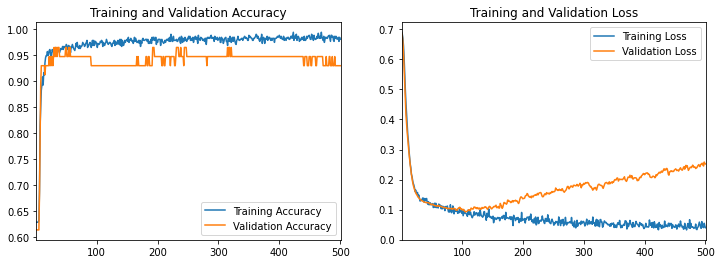

In [6]:
#Presentation of accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(val_acc)+1)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlim(1, len(val_acc)+1)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlim(1, len(val_acc)+1)
plt.title('Training and Validation Loss')
plt.show()

In [7]:

y_pred = md.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("accuracy  {}%".format(((cm[0][0] + cm[1][1])/57)*100))

accuracy  92.98245614035088%


In [8]:
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
score = f1_score(y_test, y_pred, average='binary')
print('Precision : ',precision *100 ,' %')
print('Recall : ' ,recall*100 ,' %') 
print('F1_score : ', score*100 ,' %')

Precision :  87.5  %
Recall :  95.45454545454545  %
F1_score :  91.30434782608695  %


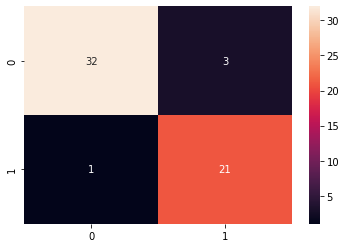

In [9]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')